In [1]:
import site
import os
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')  # so that this file can import stuff without it being in site-packages

In [2]:
# this file tests that given activations are working both as layers as well as activation functions withing a layer

from dl4seq import Model 
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
import pandas as pd
import numpy as np

%matplotlib inline

tf.__version__


**********Pytorch models could not be imported **********



C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)


'2.1.0'

## Activation Layers

Following code shows how to use different activations as a keras [`layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer).

In [3]:
# create dummy data
i = np.linspace(-20, 20, 100)
o = i + 1
data = pd.DataFrame(np.concatenate([i.reshape(-1,1), o.reshape(-1, 1)], axis=1), columns=['input', 'output'])

data.head()

,input,output
0,-20.000000,-19.000000
1,-19.595960,-18.595960
2,-19.191919,-18.191919
3,-18.787879,-17.787879
4,-18.383838,-17.383838


In [4]:
activation_layers = ['PRELU', "RELU", "TANH", "ELU", "LEAKYRELU", "THRESHOLDRELU", "SELU", 'sigmoid', 'hardsigmoid', 'crelu',
            'relu6', 'softmax', 'softplus', 'softsign', "SWISH"]

layers = {
    "Input": {"config": {"shape": (1, ), "name": "CustomInputs"}},
    "PRELU": {"config": {},
              "inputs": "CustomInputs"},
    "RELU": {"config": {},
              "inputs": "CustomInputs"},
    "TANH": {"config": {},
              "inputs": "CustomInputs"},
    "ELU": {"config": {},
              "inputs": "CustomInputs"},
    "LEAKYRELU": {"config": {},
              "inputs": "CustomInputs"},
    "THRESHOLDRELU": {"config": {},
              "inputs": "CustomInputs"},
    "SELU": {"config": {},
              "inputs": "CustomInputs"},
    "sigmoid": {"config": {},
              "inputs": "CustomInputs"},
    "hardsigmoid": {"config": {},
              "inputs": "CustomInputs"},
    "crelu": {"config": {},
              "inputs": "CustomInputs"},
    "relu6": {"config": {},
              "inputs": "CustomInputs"},
    "softmax": {"config": {},
              "inputs": "CustomInputs"},
    "softplus": {"config": {},
              "inputs": "CustomInputs"},
    "softsign": {"config": {},
              "inputs": "CustomInputs"},
    "SWISH": {"config": {},
              "inputs": "CustomInputs"},
    "Concat": {"config": {},
               "inputs": activation_layers},
    "Dense": {"config": {"units": 1}}, 
          }


In [5]:
model = Model(model={'layers':layers},
            inputs = ['input'],
            outputs = ['output'],
            lookback=1,
            epochs=1,
            batches="2d",
            batch_size=64,
            drop_remainder=True,
            transformation=None,
            shuffle=False,
            data=data)

building DL based model for regression problem
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CustomInputs (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
PRELU (PReLU)                   (None, 1)            1           CustomInputs[0][0]               
__________________________________________________________________________________________________
RELU (Activation)               (None, 1)            0           CustomInputs[0][0]               
__________________________________________________________________________________________________
TANH (Activation)               (None, 1)            0           

Number of total batches are 1
input_x shape:  (64, 1)
prev_y shape:  (64, 1)
target shape:  (64, 1, 1)
Plotting activations of layers


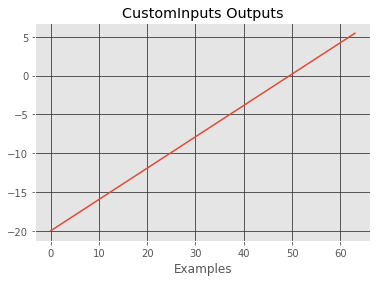

In [6]:
model.plot_layer_outputs(layer_names="CustomInputs", save=False)

In [7]:
model.plot_layer_outputs(layer_names=activation_layers, save=False)

AttributeError: 'Model' object has no attribute 'plot_activations'

## Activation Functions
Following shows how to use different activation functions as `activation function` within a keras layer. 
Application of activation function within a layer can be different than application of activation as a layer depending 
upon the equation of the forward pass of that layer. For example, in 
[`LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM), there are two activation functions, and they 
are different than if we apply activation as a layer after `LSTM`. In `LSTM` the activation appear in the equations of
LSTM. However the following cases show similar results to whe we used activation functions a layers (above). 
This is beacuse we are applying activation functions only on dense layer and are initializing the dense kerel as `ones`.

In [ ]:
layers = {"Input": {"config": {"shape": (1, ), "name": "CustomInputs"}}}

activation_layers = []
for idx, act_fn in enumerate(['tanh', 'relu', 'elu', 'leakyrelu', 'crelu', 'selu', 'relu6', 'sigmoid',
                              'hardsigmoid', 'swish']):

    # initializing the kernel/weight matrix of each dense layer with ones, so that it does not affect first forward propagation
    layers["Dense_" + act_fn] = {'config': {'units': 1, 'activation': act_fn, "kernel_initializer": "ones", "name": act_fn},
                                   'inputs': "CustomInputs"}
    activation_layers.append(act_fn)

layers["Concat"] = {"config": {"name": "concat"},
                    "inputs": activation_layers}

layers["Dense"] = {'config': {'units': 1}}

layers

In [ ]:
model = Model(model={'layers':layers},
            data=data,
            inputs = ['input'],
            outputs = ['output'],
            lookback=1,
            epochs=1,
            batches="2d",
            batch_size=64,
            drop_remainder=True,
            transformation=None,
            shuffle=False,)

In [ ]:
model.plot_layer_outputs(layer_names="CustomInputs", save=False)

In [ ]:
model.plot_layer_outputs(layer_names=activation_layers, save=False)